## Miniproject II, Guess the year !

### Import the Required Libraries

In [ ]:
import pandas as pd
import torch as t
import torch.nn as nn

import matplotlib.pyplot as plt 

!nvidia-smi


Fri Apr 23 00:20:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Check cuda version
is_cuda_available=t.cuda.is_available()
print(is_cuda_available)
# Generalize cuda for all comands without writing .cuda()
device = t.device('cuda:0') 
t.cuda.set_device(device)

True


### Using pandas, load the .csv file.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets_all/YearPredictionMSD.csv',sep=',')

### Verify whether any qualitative data is present in the dataset.

**Remarks**

- Column 0 corresponds to the years

- Column 1 corresponds to the frequencies

- Columns 2-91 corresponds to deviations of different songs

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  int64  
 1   1       50000 non-null  float64
 2   2       50000 non-null  float64
 3   3       50000 non-null  float64
 4   4       50000 non-null  float64
 5   5       50000 non-null  float64
 6   6       50000 non-null  float64
 7   7       50000 non-null  float64
 8   8       50000 non-null  float64
 9   9       50000 non-null  float64
 10  10      50000 non-null  float64
 11  11      50000 non-null  float64
 12  12      50000 non-null  float64
 13  13      50000 non-null  float64
 14  14      50000 non-null  float64
 15  15      50000 non-null  float64
 16  16      50000 non-null  float64
 17  17      50000 non-null  float64
 18  18      50000 non-null  float64
 19  19      50000 non-null  float64
 20  20      50000 non-null  float64
 21  21      50000 non-null  float64
 22

### Check for missing values. 

In [ ]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
86    0
87    0
88    0
89    0
90    0
Length: 91, dtype: int64

### Check for outliers.

In [ ]:
outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean()- (3 * data[data.columns[i]].std())
    max_t = data[data.columns[i]].mean()+ (3 * data[data.columns[i]].std())
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    percentage = count / data.shape[0]
    outliers[data.columns[i]] = "%.3f" % percentage
outliers

{'0': '0.009',
 '1': '0.011',
 '10': '0.007',
 '11': '0.008',
 '12': '0.014',
 '13': '0.015',
 '14': '0.016',
 '15': '0.022',
 '16': '0.015',
 '17': '0.016',
 '18': '0.019',
 '19': '0.020',
 '2': '0.013',
 '20': '0.016',
 '21': '0.016',
 '22': '0.015',
 '23': '0.015',
 '24': '0.017',
 '25': '0.015',
 '26': '0.016',
 '27': '0.021',
 '28': '0.019',
 '29': '0.016',
 '3': '0.012',
 '30': '0.014',
 '31': '0.017',
 '32': '0.017',
 '33': '0.015',
 '34': '0.012',
 '35': '0.016',
 '36': '0.016',
 '37': '0.011',
 '38': '0.021',
 '39': '0.014',
 '4': '0.014',
 '40': '0.015',
 '41': '0.017',
 '42': '0.017',
 '43': '0.015',
 '44': '0.020',
 '45': '0.017',
 '46': '0.014',
 '47': '0.019',
 '48': '0.023',
 '49': '0.015',
 '5': '0.004',
 '50': '0.015',
 '51': '0.017',
 '52': '0.016',
 '53': '0.016',
 '54': '0.016',
 '55': '0.018',
 '56': '0.020',
 '57': '0.020',
 '58': '0.010',
 '59': '0.014',
 '6': '0.016',
 '60': '0.015',
 '61': '0.014',
 '62': '0.015',
 '63': '0.021',
 '64': '0.021',
 '65': '0.019',

### Data Rescaling

In [ ]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
X = (X - X.min()) / (X.max() - X.min())
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,0.860844,0.520015,0.638629,0.468319,0.279845,0.267357,0.497138,0.325330,0.617330,0.340078,0.736465,0.396681,0.023633,0.013080,0.023295,0.022508,0.021186,0.045069,0.057859,0.035319,0.043588,0.064035,0.024940,0.024014,0.625392,0.362336,0.451613,0.525035,0.564584,0.357288,0.636241,0.516722,0.345469,0.231320,0.408226,0.320482,0.290368,0.502239,0.721175,0.484187,...,0.480456,0.391836,0.701577,0.557544,0.736049,0.326759,0.357372,0.349611,0.455129,0.362534,0.328069,0.471781,0.444616,0.562330,0.690142,0.393331,0.494989,0.356332,0.371582,0.530982,0.758821,0.549344,0.736229,0.458136,0.488290,0.343237,0.378968,0.489137,0.738900,0.481110,0.432239,0.569115,0.327585,0.493224,0.512380,0.659509,0.528092,0.499917,0.542475,0.459884
1,0.837937,0.514852,0.633315,0.483503,0.298094,0.202651,0.616818,0.410166,0.670349,0.414250,0.721845,0.414435,0.109941,0.051058,0.013881,0.013609,0.044415,0.049111,0.144839,0.056933,0.057083,0.098425,0.036975,0.046102,0.633301,0.370472,0.454266,0.540229,0.564455,0.336395,0.641442,0.522144,0.353886,0.217109,0.434182,0.332409,0.281976,0.505391,0.713637,0.512584,...,0.499751,0.394315,0.717523,0.530304,0.719890,0.342989,0.354835,0.338569,0.438305,0.356827,0.311824,0.451976,0.467118,0.533274,0.707849,0.403751,0.455827,0.350092,0.377634,0.494529,0.767805,0.577469,0.739384,0.449818,0.501395,0.332322,0.372183,0.489054,0.742439,0.457663,0.424980,0.577781,0.321123,0.502724,0.484122,0.656912,0.528448,0.529855,0.551845,0.495266
2,0.880010,0.537641,0.605290,0.485205,0.307745,0.237314,0.574141,0.399441,0.657280,0.380663,0.728694,0.417698,0.016716,0.015403,0.025063,0.018661,0.017827,0.060722,0.070531,0.043578,0.015330,0.053833,0.037669,0.027228,0.626575,0.363008,0.441923,0.515235,0.580486,0.366650,0.627013,0.505054,0.340774,0.241880,0.407191,0.333220,0.293288,0.486612,0.711602,0.471003,...,0.496158,0.401365,0.704610,0.540896,0.735398,0.334911,0.366231,0.345503,0.444752,0.374538,0.330659,0.484858,0.456667,0.546795,0.668663,0.400551,0.487904,0.358597,0.363025,0.523082,0.782685,0.559796,0.731759,0.485004,0.476917,0.344134,0.376797,0.478801,0.735557,0.487236,0.422381,0.589197,0.300206,0.491692,0.509335,0.678347,0.496790,0.503723,0.549798,0.455684
3,0.828773,0.480350,0.567581,0.446035,0.327202,0.195050,0.603655,0.339514,0.596574,0.299154,0.780358,0.389752,0.092901,0.054135,0.016388,0.013677,0.042247,0.025529,0.070572,0.037163,0.042466,0.059644,0.024473,0.019502,0.650030,0.370576,0.449535,0.499766,0.561835,0.367091,0.640484,0.489344,0.324766,0.212650,0.417298,0.336261,0.287999,0.501449,0.717221,0.468120,...,0.491171,0.376587,0.699051,0.548171,0.755415,0.309770,0.355084,0.343428,0.472858,0.369204,0.322035,0.468474,0.443752,0.576012,0.694600,0.394956,0.458024,0.339310,0.355069,0.526110,0.749572,0.580762,0.740869,0.483389,0.474205,0.323171,0.394617,0.491143,0.744013,0.491792,0.453535,0.539840,0.308665,0.471793,0.477423,0.689537,0.504114,0.525228,0.567246,0.483691
4,0.880257,0.555214,0.627082,0.467304,0.283848,0.246879,0.541533,0.346750,0.640634,0.375840,0.713753,0.426820,0.117341,0.020519,0.019449,0.008484,0.022831,0.039742,0.059473,0.049614,0.031232,0.083520,0.023912,0.029033,0.629367,0.366144,0.455937,0.503131,0.570756,0.360661,0.631476,0.498647,0.349101,0.222320,0.428646,0.325555,0.290844,0.486096,0.721471,0.474433,...,0.505727,0.398376,0.705610,0.538779,0.724928,0.320749,0.350985,0.334837,0.436381,0.368794,0.320508,0.464260,0.451066,0.565954,0.696869,0.399991,0.472920,0.354997,0.330297,0.512236,0.768805,0.560813,0.745138,0.429043,0.502471,0.341328,0.375130,0.492322,0.743830,0.464337,0.429187,0.568728,0.329063,0.481793,0.505700,0.663939,0.525252,0.520872,0.551543,0.497890


In [ ]:
Y.head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: 0, dtype: int64

### Splitting the Dataset

In [ ]:
X.shape

train_end = int(len(X) * 0.8)
dev_end = int(len(X) * 0.9)

X_shuffle = X.sample(frac=1, random_state=0)
Y_shuffle = Y.sample(frac=1, random_state=0)

x_train = X_shuffle.iloc[:train_end,:]
y_train = Y_shuffle.iloc[:train_end]
x_dev = X_shuffle.iloc[train_end:dev_end,:]
y_dev = Y_shuffle.iloc[train_end:dev_end]
x_test = X_shuffle.iloc[dev_end:,:]
y_test = Y_shuffle.iloc[dev_end:]

print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

(40000, 90) (40000,)
(5000, 90) (5000,)
(5000, 90) (5000,)


### Part 2: Create and Train the model

### import relevant modules

### Convert the DataFrames into tensors. 

In [ ]:
x_train = t.tensor(x_train.values).float()
y_train = t.tensor(y_train.values).float()
x_dev = t.tensor(x_dev.values).float()
y_dev = t.tensor(y_dev.values).float()
x_test = t.tensor(x_test.values).float()
y_test = t.tensor(y_test.values).float()

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([40000, 90])
torch.Size([40000])


In [ ]:
x_train.shape[1]

90

### Model: Compile and fit

0 3994038.75
100 3651263.75
200 2646766.0
300 1414638.75
400 508934.09375
500 111702.671875
600 15032.6611328125
700 2055.36865234375
800 1005.4210205078125
900 946.11279296875
Ground truth: 2005.0 Prediction: 2005.5205078125


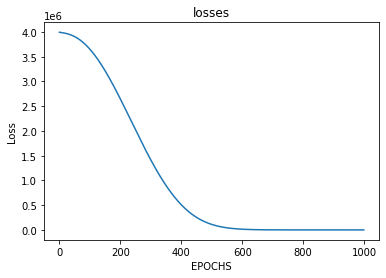

In [ ]:
# Model architecture 
model = nn.Sequential(nn.Linear(x_train.shape[1], 100),nn.Linear(100, 1))
# Loss 
loss_function = t.nn.MSELoss()
# Optimizer
optimizer = t.optim.Adam(model.parameters(), lr=0.001)
# Training

EPOCHS=1000

losses = []
for i in range(EPOCHS):
    y_pred = model(x_train).squeeze()
    loss = loss_function(y_pred, y_train)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        print(i, loss.item())


pred = model(x_test[0])
print("Ground truth:", y_test[0].item(), "Prediction:",pred.item())

plt.plot(range(0,1000), losses)
plt.title('losses')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.show()

# Part 3 (Optional): Implement validation and testing using the whole validation and test datasets.

This part is optional, but it will useful to, at least, to try to implement, they are not difficult
however.
1. Implement a validation step after each training epoch, you can use the first register of the validation dataset, or the whole validation dataset.
2. Test the model using more than a single sample from the test dataset.

**Mandatory:** Think about a function that uses the gradient but it can be calculated, so how to calculate the gradient during the training process.

Imagine you have the gradient descent. Imagine you cannot pass the funtion the gradient. So how to solve the problem of calculating the gradient without using the gradient descent. SO is it still possible to train the NN? Think of example of X square. There are methods without usng the function, but we need find the gradient descent without derivatives, i.e, without doing derivatives.

In [ ]:
# Extract all predictions
pred = model(x_test)
print(pred)

tensor([[2005.5205],
        [1979.3074],
        [2028.5500],
        ...,
        [1980.4119],
        [1962.4541],
        [1992.7382]], grad_fn=<AddmmBackward>)


In [ ]:
import math
loss = loss_function(pred,y_test).item()
print("Square root of MSE: ",math.sqrt(loss))

Square root of MSE:  30.660170931404945


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
abs_loss = nn.L1Loss()
loss  = abs_loss(pred, y_test).item() 
print("Avg of absolute error of test: ", loss)

Avg of absolute error of test:  23.342870712280273


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [ ]:
# MSE 
from sklearn.metrics import mean_squared_error

pred = pd.DataFrame(pred)
labels = pd.DataFrame(y_test)
mean_squared_error(labels, pred)

940.7669028933734

# Validation loss by epochs

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([40000])) that is different to the input size (torch.Size([40000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


training: 
0 3993796.75
training: 
100 3651965.0
training: 
200 2646987.5
training: 
300 1414304.5
training: 
400 508555.84375
training: 
500 111535.5859375
training: 
600 14994.9248046875
training: 
700 2047.8155517578125
training: 
800 1001.3643798828125
training: 
900 942.21923828125


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


val: 
0 924.1326904296875
val: 
100 918.7447509765625
val: 
200 914.0256958007812
val: 
300 909.0357055664062
val: 
400 903.7448120117188
val: 
500 898.1561279296875
val: 
600 892.26904296875
val: 
700 886.0803833007812
val: 
800 879.5925903320312
val: 
900 872.8035888671875


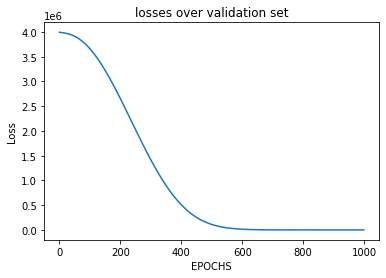

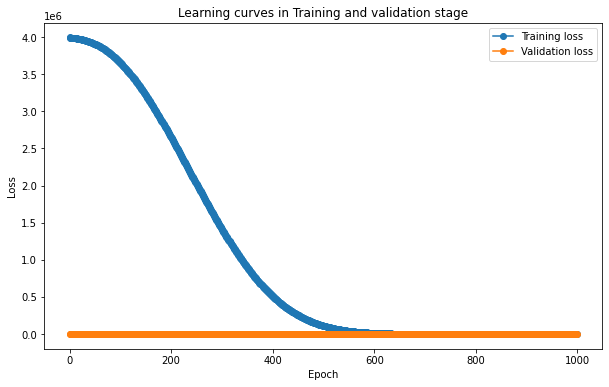

In [ ]:
# Model 
'''
model = nn.Sequential(nn.Linear(x_train.shape[1], 100), \
nn.ReLU(), \
nn.Linear(100, 50), \
nn.ReLU(), \
nn.Linear(50, 25), \
nn.ReLU(), \
nn.Linear(25, 1))
'''
model = nn.Sequential(nn.Linear(x_train.shape[1], 100),nn.Linear(100, 1))
# Loss 
loss_function = t.nn.MSELoss()
# Optimizer
optimizer = t.optim.Adam(model.parameters(), lr=0.001)

# Validation

EPOCHS=1000
# Training


losses_val = []
losses_train = []
for i in range(EPOCHS):

    # clear previous gradient computation
    optimizer.zero_grad()

    # forward propagation
    y_pred = model(x_train)

    # calculate the loss
    loss = loss_function(y_pred, y_train)
    # update average loss
    losses_train.append(loss.item())

    # backpropagate to compute gradients
    loss.backward()

    # update model weights
    optimizer.step()
    if i%100 == 0:
        print("training: ")
        print(i, loss.item())

# validation
for i in range(EPOCHS):
    # clear previous gradient computation
    optimizer.zero_grad()

    # forward propagation
    y_pred_val = model(x_dev)

    # calculate the loss
    loss = loss_function(y_pred_val, y_dev)

    # update average loss
    losses_val.append(loss.item())
    
    loss.backward()
    # update model weights
    optimizer.step()
    if i%100 == 0:
      print("val: ")
      print(i, loss.item())

#pred = model(x_test[0])
#print("Ground truth:", y_test[0].item(), "Prediction:",pred.item())

plt.plot(range(0,1000), losses)
plt.title('losses over validation set')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.show()
plt.show()
#Substract the prediction form real target, calculate abs val, 


plt.figure(figsize=(10,6))
plt.plot(losses_train, '-o', label='Training loss')
plt.plot(losses_val, '-o', label='Validation loss')
plt.legend()
plt.title('Learning curves in Training and validation stage')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Training

EPOCHS=1000

losses_val = []
losses_train = []
for i in range(EPOCHS):

    # clear previous gradient computation
    optimizer.zero_grad()

    # forward propagation
    y_pred = model(x_train)

    # calculate the loss
    loss = loss_function(y_pred, y_train)
    # update average loss
    losses_train.append(loss.item())

    # backpropagate to compute gradients
    loss.backward()

    # update model weights
    optimizer.step()
    if i%100 == 0:
        print("training: ")
        print(i, loss.item())

# validation
for i in range(EPOCHS):
    # clear previous gradient computation
    optimizer.zero_grad()

    # forward propagation
    y_pred_val = model(x_dev)

    # calculate the loss
    loss = loss_function(y_pred_val, y_dev)

    # update average loss
    losses_val.append(loss.item())
    
    loss.backward()
    # update model weights
    optimizer.step()
    if i%100 == 0:
      print("val: ")
      print(i, loss.item())



#pred = model(x_test[0])
#print("Ground truth:", y_test[0].item(), "Prediction:",pred.item())



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


val: 
0 923.8046875
val: 
100 919.3480834960938
val: 
200 914.6468505859375
val: 
300 909.6446533203125
val: 
400 904.3450317382812
val: 
500 898.7448120117188
val: 
600 892.8479614257812
val: 
700 886.6480712890625
val: 
800 880.1478271484375
val: 
900 873.349853515625


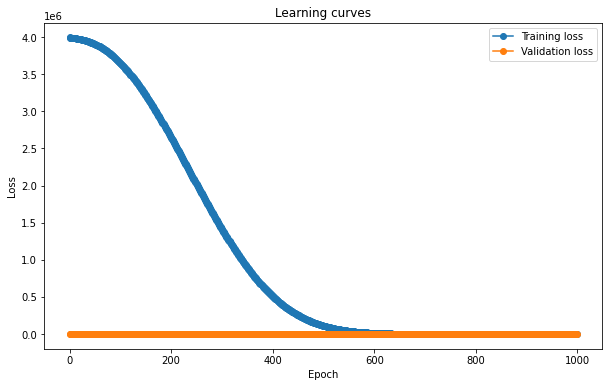